In [1]:
### Importing the necessary libraries ###
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as stats
import xarray as xr
import cartopy.crs as ccrs
import cartopy.feature as cfeature


KeyboardInterrupt: 

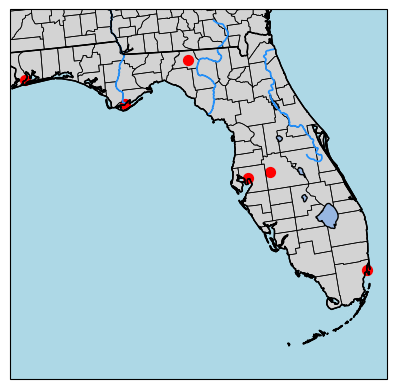

In [ ]:
### Creating map of Florida ###
fig, axes = plt.subplots(1, 1, subplot_kw={'projection': ccrs.LambertConformal()})
axes.set_extent([-87.5, -80.0, 24.5, 31.0], crs=ccrs.PlateCarree())
counties = cfeature.NaturalEarthFeature(category='cultural', name='admin_2_counties', scale='10m', facecolor='none', linewidth=0.5)
axes.add_feature(counties, edgecolor='black')
axes.add_feature(cfeature.LAND, facecolor='lightgray')
axes.add_feature(cfeature.COASTLINE, edgecolor='black')
axes.add_feature(cfeature.BORDERS, edgecolor='black')
axes.add_feature(cfeature.LAKES, edgecolor='black')
axes.add_feature(cfeature.RIVERS, edgecolor='dodgerblue', linewidth = 1.25 )
axes.add_feature(cfeature.STATES, edgecolor='black')
axes.add_feature(cfeature.LAND, facecolor='lightgray')
axes.add_feature(cfeature.OCEAN, facecolor='lightblue')

### Creating Points for the Cities being analyzed ###
Tampa = [27.9475, -82.4584]
Miami = [25.7617, -80.1918]
Apalachicola = [29.7257, -84.9828]
Madison = [30.4461, -83.4193]
Lakeland = [27.9944024, -81.9498042]
Pensicola = [30.4213, -87.2169]

### Plotting those points on the map ###
axes.scatter(Tampa[1], Tampa[0], color='red', marker='o', s=50, label='Tampa', transform=ccrs.PlateCarree(), zorder = 1)
axes.scatter(Miami[1], Miami[0], color='red', marker='o', s=50, label='Miami', transform=ccrs.PlateCarree(), zorder = 1)   
axes.scatter(Apalachicola[1], Apalachicola[0], color='red', marker='o', s=50, label='Apalachicola', transform=ccrs.PlateCarree(),zorder = 1)
axes.scatter(Madison[1], Madison[0], color='red', marker='o', s=50, label='Madison', transform=ccrs.PlateCarree(), zorder = 1)
axes.scatter(Lakeland[1], Lakeland[0], color='red', marker='o', s=50, label='Lakeland', transform=ccrs.PlateCarree(), zorder = 1)  
axes.scatter(Pensicola[1], Pensicola[0], color='red', marker='o', s=50, label='Pensicola', transform=ccrs.PlateCarree(), zorder = 1)




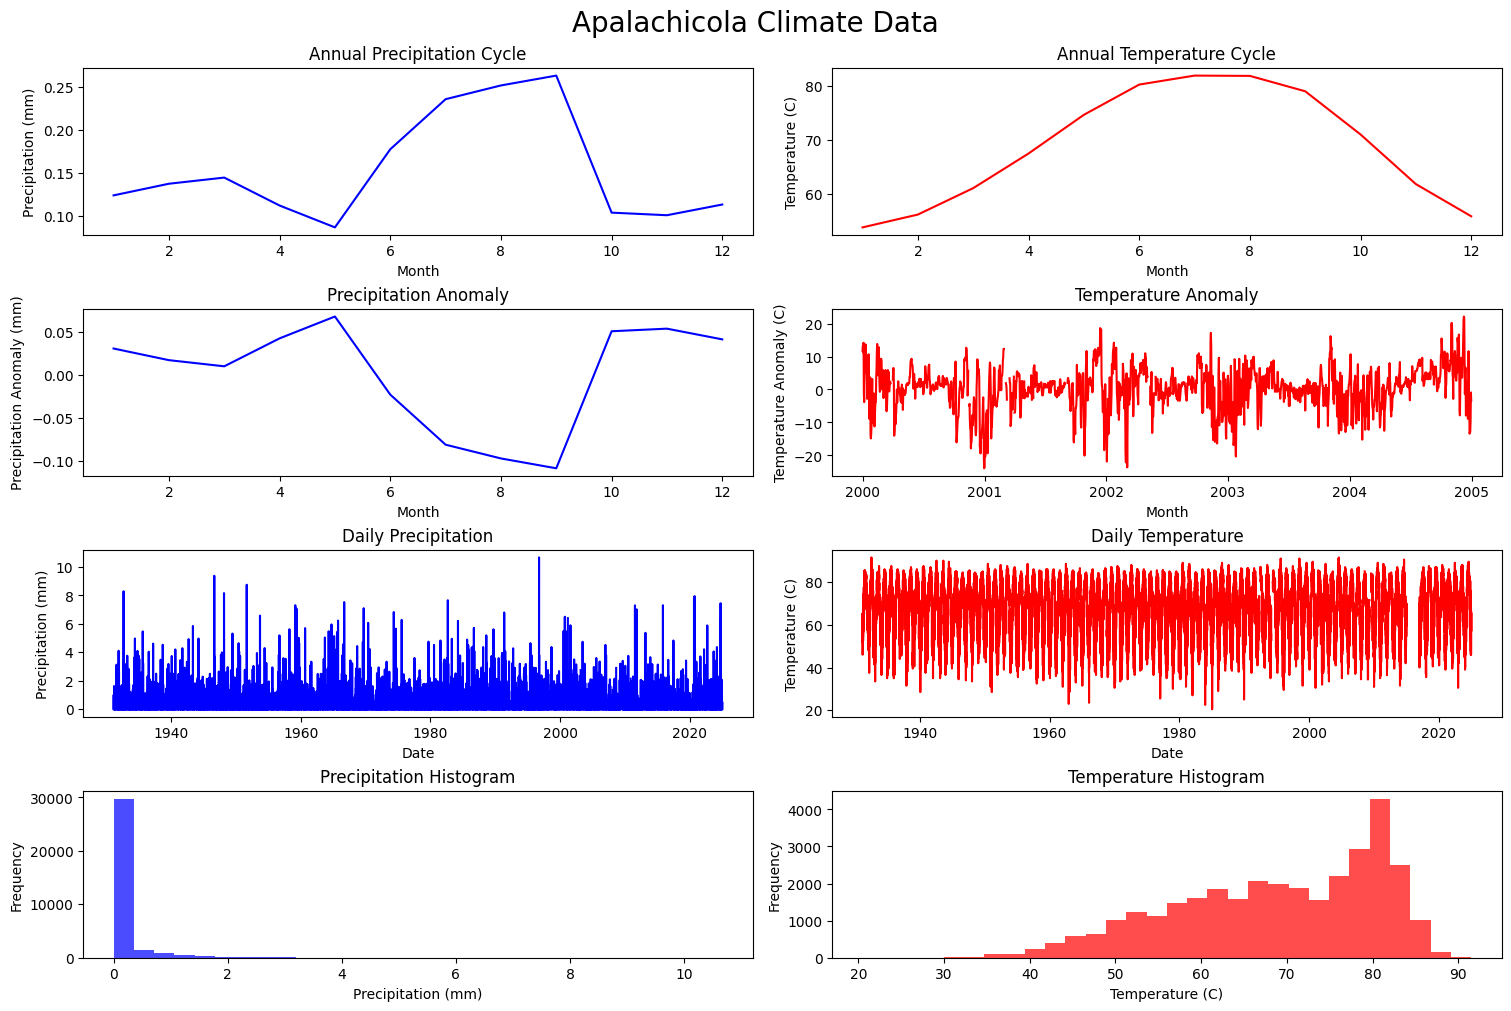

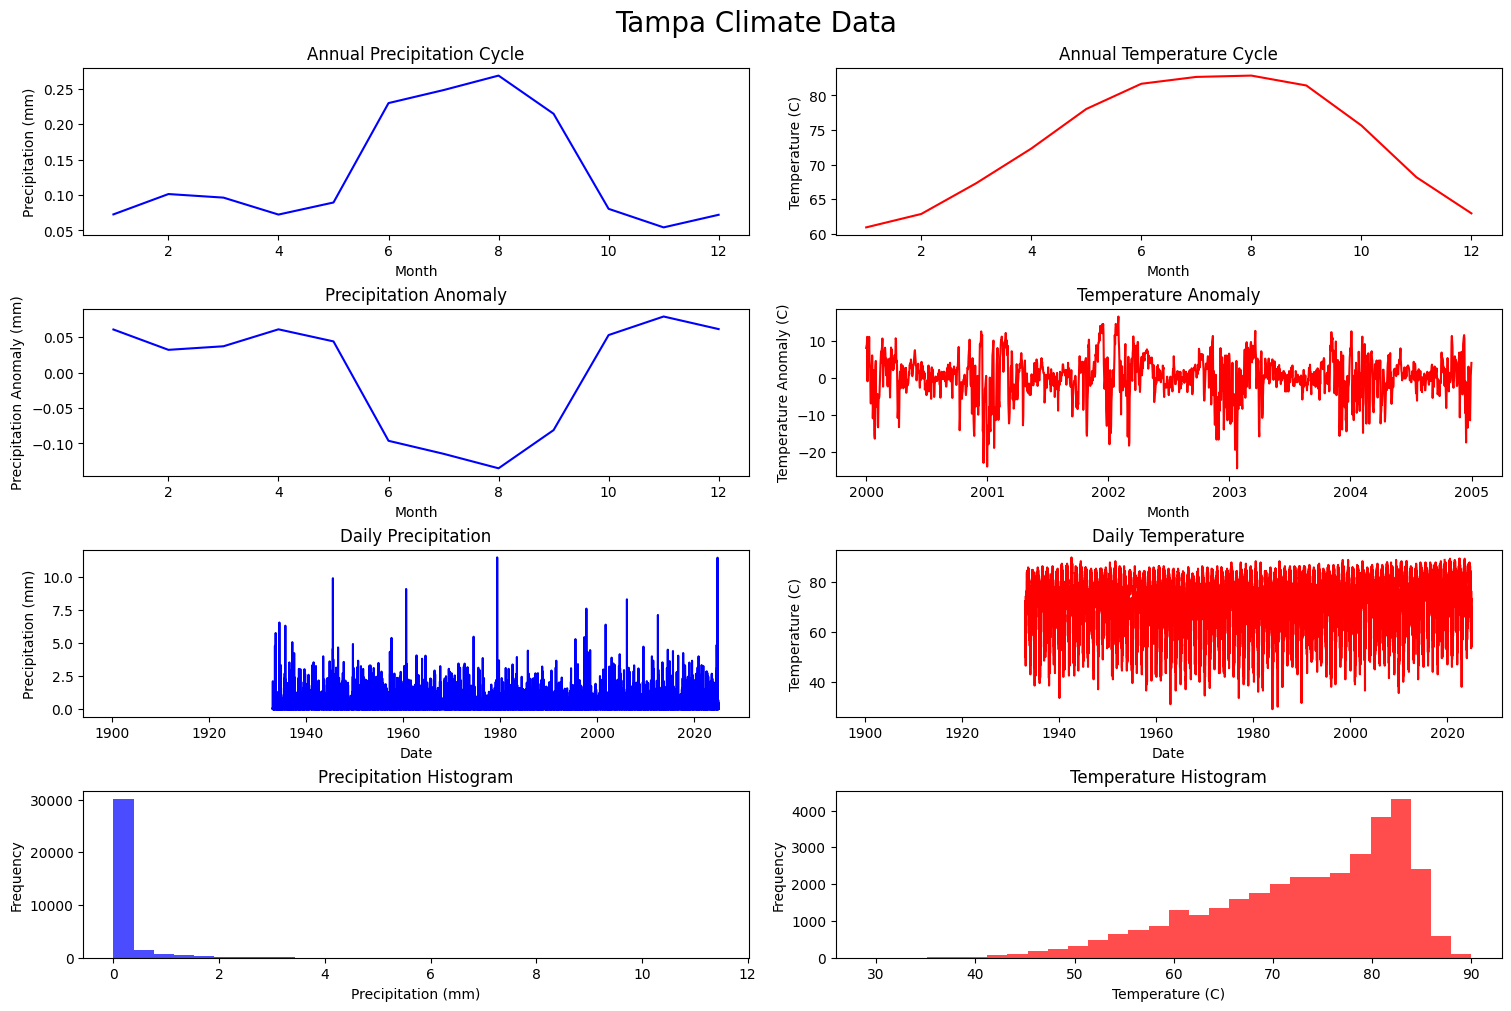

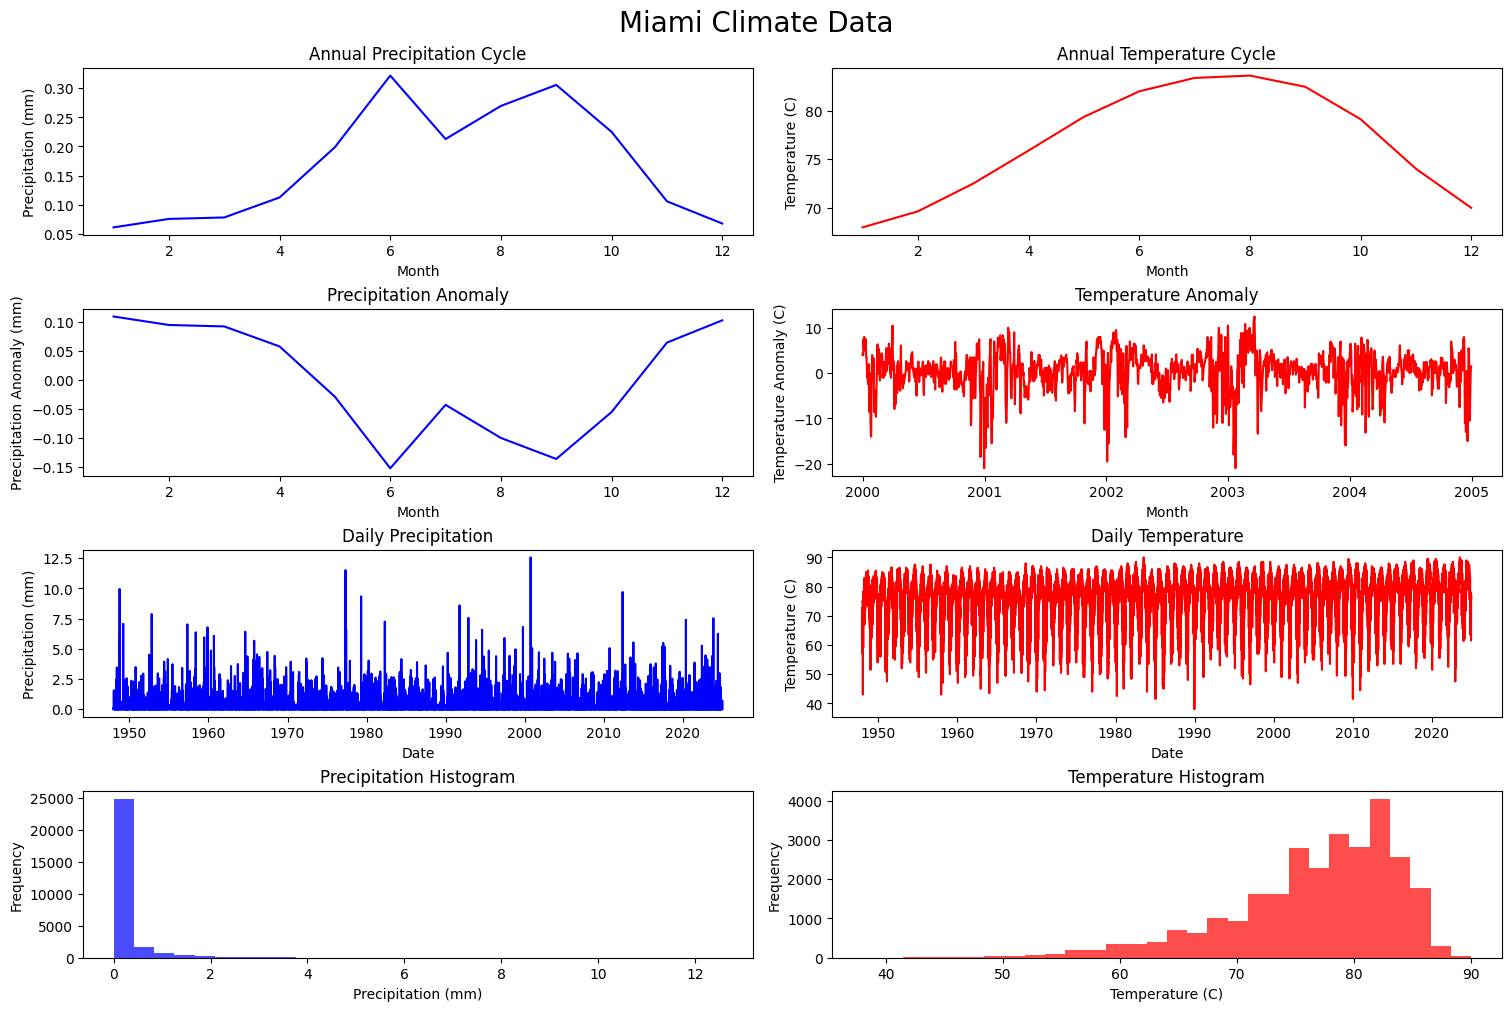

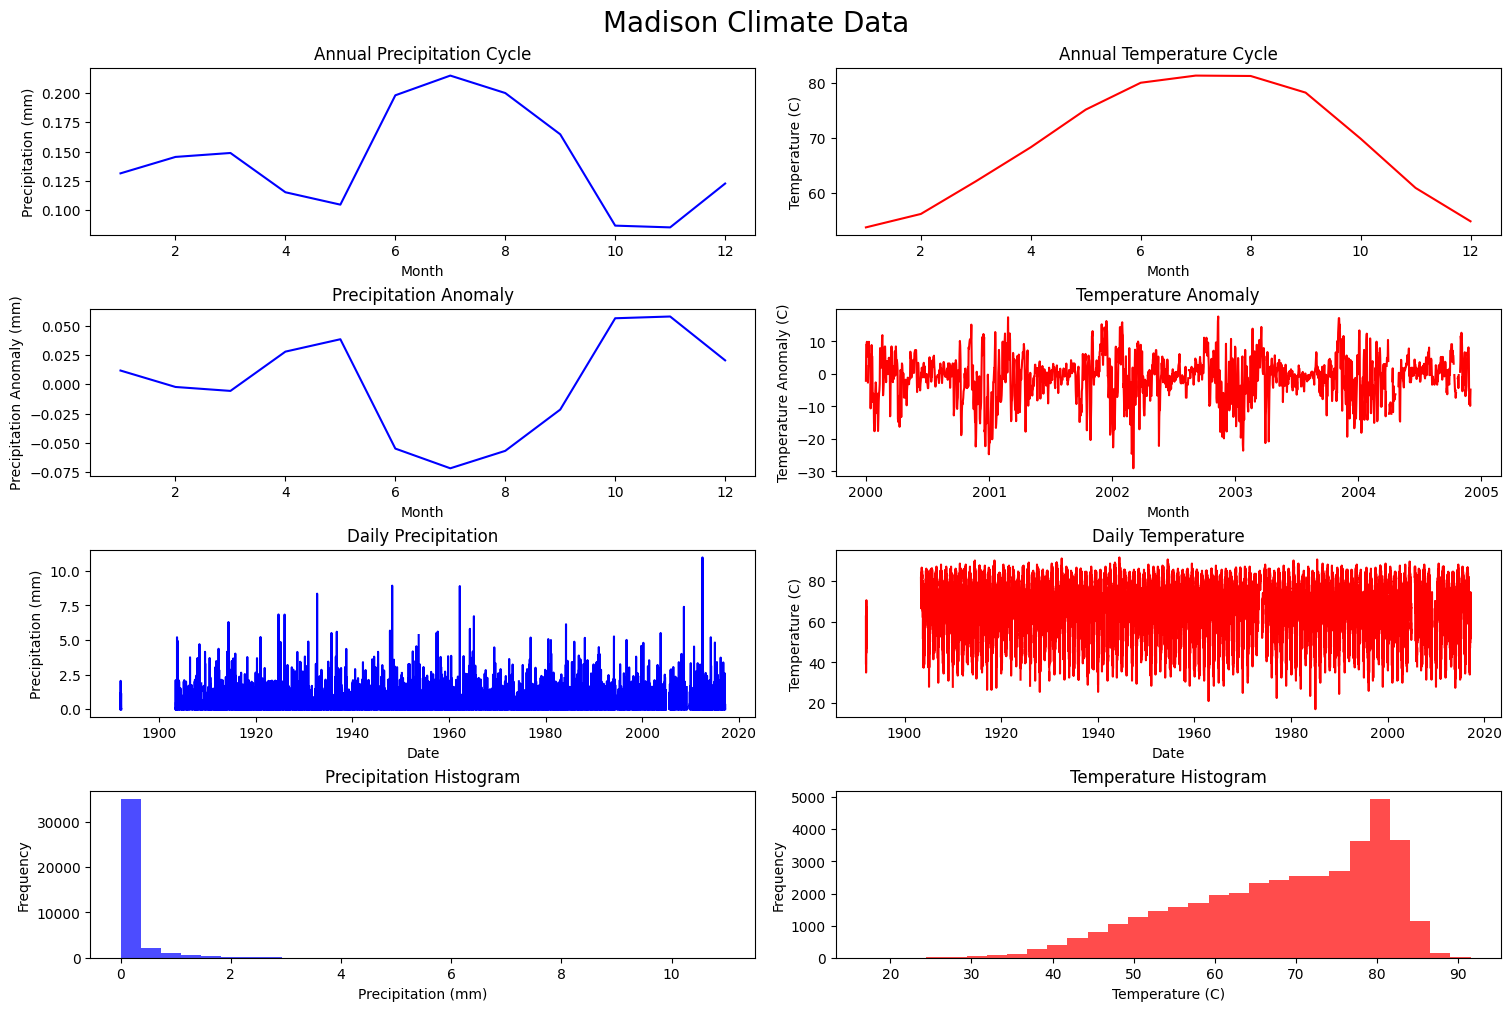

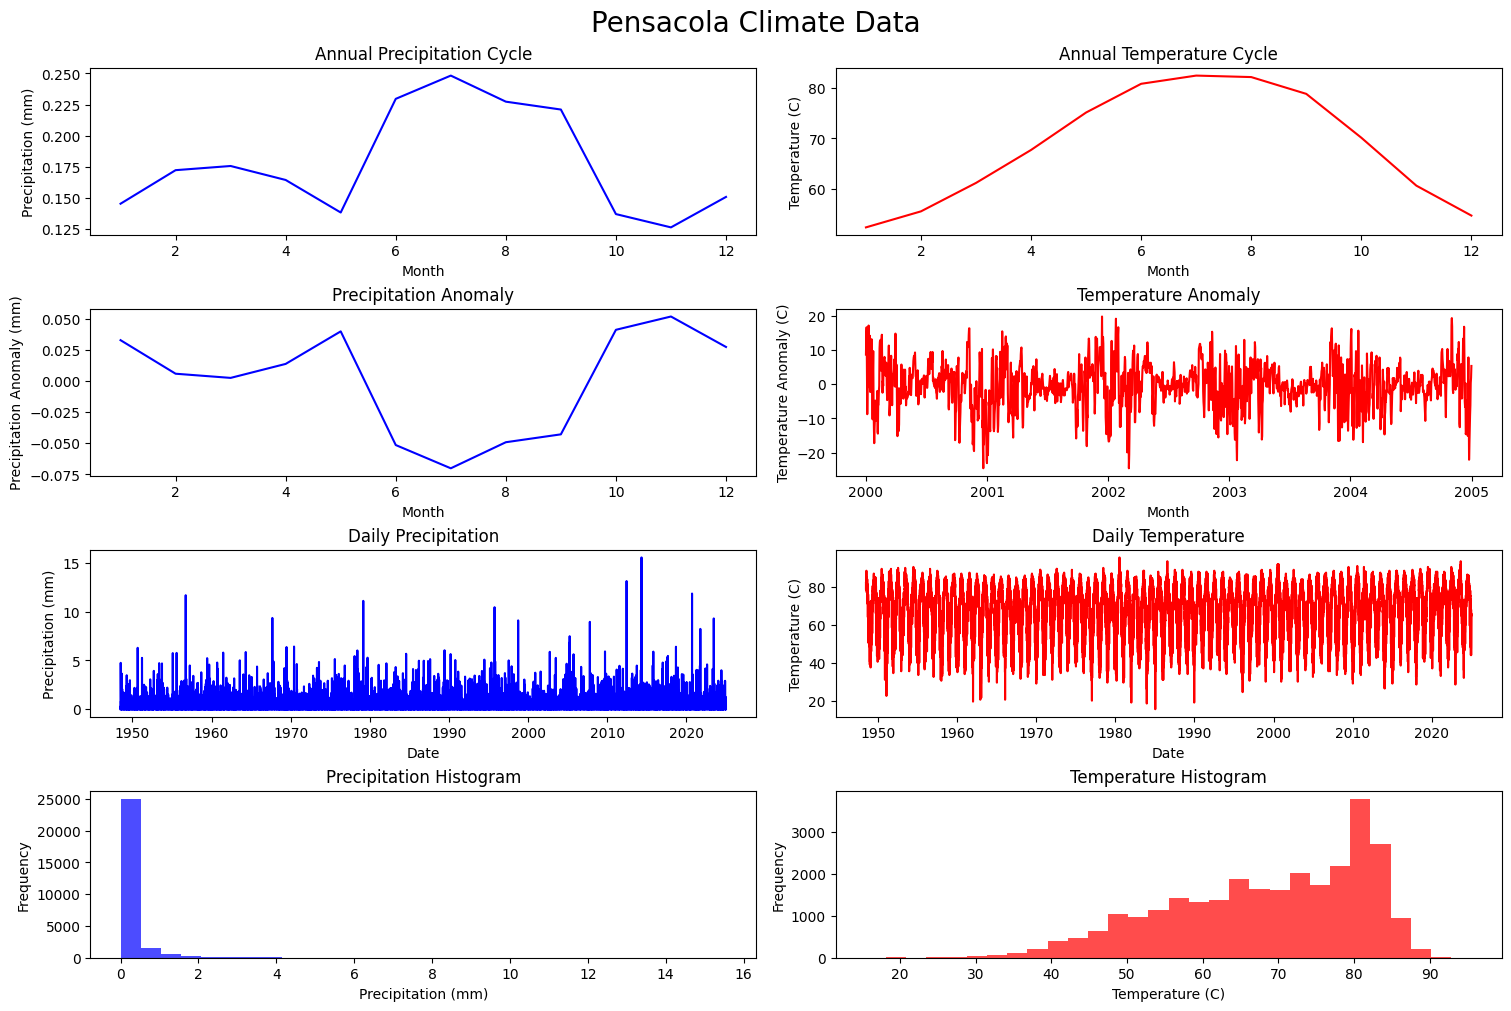

In [ ]:
### Defining a function to plot and read the data for cities ###
def plot_city_data(city_name):
    '''Function to read the city name, and plot the data for that city '''

    ### Reading the Data for the city ###
    city_data = pd.read_csv(f'data/{city_name}_data.csv', skipinitialspace=True,
                             na_values = [-99.9, -99.99, -99.90000, -99.9999, -99.999999, -99.9999999, -99.90000000])
    city_data['date'] = pd.to_datetime(city_data[['YEAR', 'MONTH','DAY']], errors = 'coerce')
    city_data = city_data.dropna(subset='date')
    city_data = city_data.drop(columns=['YEAR', 'MONTH', 'DAY'])
    city_data = city_data.set_index('date')
    city_precip = city_data['PRECIPITATION']
    city_temp = city_data['MEAN TEMP']
    city_precip_mean = city_precip.mean()
    city_temp_mean = city_temp.mean()
    ### Annual Cycle of Precip and Temp ### 
    city_precip_ancycle = city_precip.groupby(city_precip.index.month).mean()
    city_temp_ancycle = city_temp.groupby(city_temp.index.month).mean()
    ### Anomaly Data precip and temp ###
    city_precip_anomaly = city_precip_mean - city_precip_ancycle

    ### Select 4 year time period to find synoptic temperature anomalies for temperature ###
    city_data['Monthly Mean Temp'] = city_data.index.month.map(city_temp_ancycle)
    city_temp_anom = city_data['MEAN TEMP'] - city_data['Monthly Mean Temp']
    city_temp_anom = city_temp_anom.loc['2000-01-01':'2004-12-31']
    ### Plotting the Data ###
    fig, axes = plt.subplots(4, 2, figsize=(15, 10), constrained_layout=True)
    axes[0,0].plot(city_precip_ancycle.index, city_precip_ancycle, color='blue')
    axes[0,1].plot(city_temp_ancycle.index, city_temp_ancycle, color='red')
    axes[1,0].plot(city_precip_anomaly.index, city_precip_anomaly, color='blue')
    axes[1,1].plot(city_temp_anom.index, city_temp_anom, color='red')
    axes[2,0].plot(city_precip.index, city_precip, color='blue')
    axes[2,1].plot(city_temp.index, city_temp, color='red')
    axes[3,0].hist(city_precip, bins=30, color='blue', alpha=0.7)
    axes[3,1].hist(city_temp, bins=30, color='red', alpha=0.7)

    ### Adding titles and Lables to the plots ###
    fig.suptitle(f'{city_name} Climate Data', fontsize = 20) # Adding subtitle to figure to easily identify the city
    ### Addind Axes titles ###
    axes[0,0].set_title('Annual Precipitation Cycle')
    axes[0,1].set_title('Annual Temperature Cycle')
    axes[1,0].set_title('Precipitation Anomaly')
    axes[1,1].set_title('Temperature Anomaly')
    axes[2,0].set_title('Daily Precipitation')
    axes[2,1].set_title('Daily Temperature')
    axes[3,0].set_title('Precipitation Histogram')
    axes[3,1].set_title('Temperature Histogram')
   ### Adding Y axis labels for each axes ###
    axes[0,0].set_ylabel('Precipitation (mm)')
    axes[0,1].set_ylabel('Temperature (C)')
    axes[1,0].set_ylabel('Precipitation Anomaly (mm)')
    axes[1,1].set_ylabel('Temperature Anomaly (C)')
    axes[2,0].set_ylabel('Precipitation (mm)')
    axes[2,1].set_ylabel('Temperature (C)')
    axes[3,0].set_ylabel('Frequency')
    axes[3,1].set_ylabel('Frequency')
    ### Adding X axis labels for each axes ###
    axes[3,0].set_xlabel('Precipitation (mm)')
    axes[3,1].set_xlabel('Temperature (C)')
    axes[0,0].set_xlabel('Month')
    axes[0,1].set_xlabel('Month')
    axes[1,0].set_xlabel('Month')
    axes[1,1].set_xlabel('Month')
    axes[2,0].set_xlabel('Date')
    axes[2,1].set_xlabel('Date')
    return(city_precip, city_temp)

### Creating a loop to call the function for each city ###
Dict = {}
cities = ['Apalachicola', 'Tampa', 'Miami', 'Madison', 'Pensacola']
for city in cities:
    Dict[city] = plot_city_data(city)

In [ ]:
### Creating a Table to show max, min, mean, and std of the data ###
data = pd.DataFrame(Dict, index = ['Precip', 'Temp'])
data['Pensacola']['Temp'].max()
for city in cities: 
    ### Finding the mean of the data ###
    mean_precip = data[city]['Precip'].mean()
    mean_temp = data[city]['Temp'].mean()
    ##

    print(f'{city}:', f'{mean_precip:.3f}')




Apalachicola: 0.154
Tampa: 0.134
Miami: 0.170
Madison: 0.143
Pensacola: 0.178
